### Problem Statement

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each 
passenger the data include information on their mileage history and on different ways they accrued or spent miles in the 
last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID


Balance--Number of miles eligible for award travel


Qual_mile--Number of miles counted as qualifying for Topflight status


cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:


1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000


Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months


Bonus_trans--Number of non-flight bonus transactions in the past 12 months


Flight_miles_12mo--Number of flight miles in the past 12 months


Flight_trans_12--Number of flight transactions in the past 12 months


Days_since_enrolled--Number of days since enrolled in flier program


Award--whether that person had award flight (free flight) or not

In [22]:
# Importing the rrequired libraries

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data set

df = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
# Getting descriptive statistics

df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
# Getting data set information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df['Award?'].value_counts() 

0    2518
1    1481
Name: Award?, dtype: int64

The feature 'ID#' is not useful for the determining the output variable.

In [6]:
df = df.drop( 'ID#', axis = 1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [42]:
# Performing feature scaling

scalar = StandardScaler()
df_scaled = scalar.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [43]:
# Using Elbow method for finding number of clusters

wcss = []

for i in range(2,15):
    model = KMeans(n_clusters = i)
    model.fit(df_scaled)
    inertia = model.inertia_
    wcss.append(inertia)

In [44]:
wcss

[35409.5166298613,
 30899.271221785566,
 27153.95217804606,
 24541.274453305843,
 21470.55632535211,
 18891.92670311129,
 17316.753604356494,
 15964.91839772317,
 14730.254231642184,
 13705.544027986018,
 12947.224506154169,
 12494.36522089213,
 12061.209375194603]

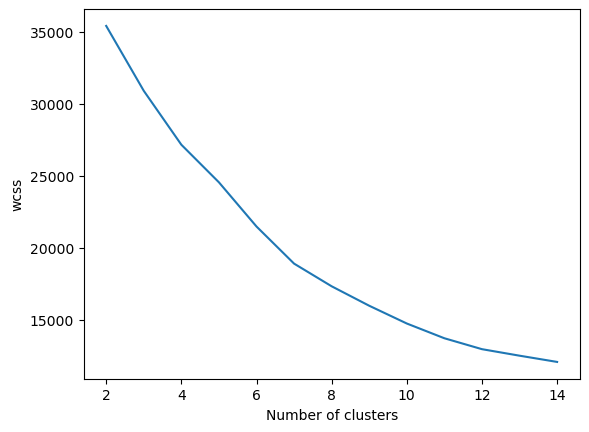

In [45]:
plt.plot(range(2,15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
silh = []

for i in range(2,15):
    model = KMeans(n_clusters = i)
    labels = model.fit_predict(df_scaled)
    score = silhouette_score(df_scaled,labels)
    print(i,score)
    silh.append(score)

2 0.32542136327826215
3 0.3113106956400725
4 0.32441456856796547
5 0.3185098934204063
6 0.2770617816818105
7 0.28363347870670286
8 0.23680303467419028
9 0.24474956153563607
10 0.2606178050186951
11 0.2675669712992125
12 0.2745687466848356
13 0.2759555570962728
14 0.2777683353270562


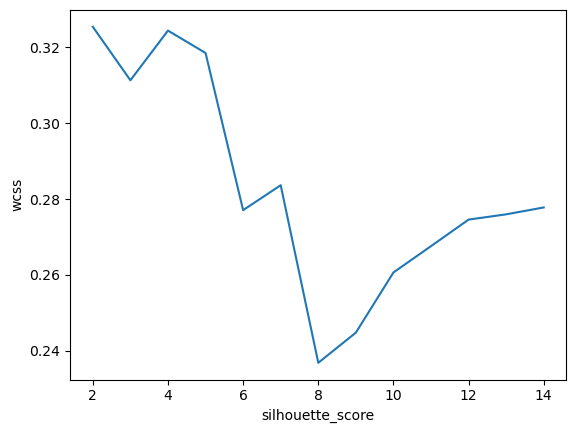

In [48]:
plt.plot(range(2,15), silh)
plt.xlabel('silhouette_score')
plt.ylabel('wcss')
plt.show()

In [49]:
# From above we can select we can select number  of clusters = 6

In [50]:
# Building the KMeans Clustering model

model = KMeans(n_clusters = 6, random_state = 0)
Clusters = model.fit_predict(df_scaled)
Clusters


array([2, 2, 2, ..., 1, 2, 2])

In [51]:
df_scaled['Clusters'] = Clusters

In [52]:
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,2
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,2
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,2
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,2
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,2
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,2
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,1
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,2


<AxesSubplot:xlabel='Clusters', ylabel='count'>

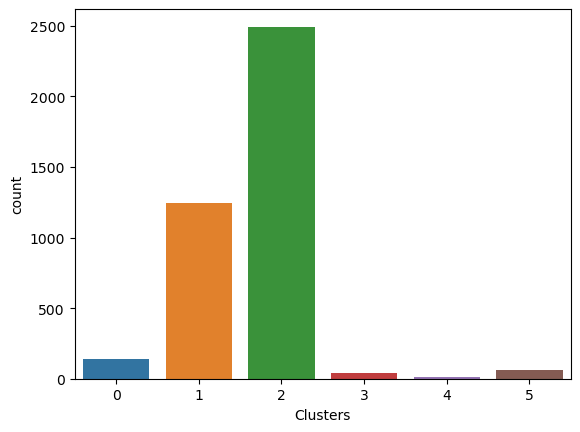

In [54]:
sns.countplot(x="Clusters", data=df_scaled)

In [55]:
# Using PCA with Minmaxscalar

from sklearn.decomposition import PCA

In [56]:
scalar = MinMaxScaler()
df_scaled = scalar.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [61]:
pca = PCA()
pca_fitted = pca.fit_transform(df_scaled)
pca_fitted = pd.DataFrame(pca_fitted)
pca_fitted

,0,1,2,3,4,5,6,7,8,9,10
0,-0.407742,-0.020574,0.421877,-0.058577,-0.006612,-0.001351,0.017207,-0.009267,-0.025287,0.005343,-0.000637
1,-0.407213,-0.019828,0.417400,-0.051175,-0.004673,-0.004821,0.008413,-0.009310,-0.027599,0.007127,-0.000506
2,-0.401681,-0.011528,0.423673,-0.031022,-0.002784,-0.008136,0.004068,0.005523,-0.016951,0.016074,-0.000165
3,-0.408691,-0.021903,0.415954,-0.059589,-0.005822,-0.002290,0.014726,-0.011032,-0.031637,0.007905,-0.000866
4,0.833653,0.240266,0.176760,0.053496,0.002062,-0.036519,-0.020511,-0.034388,-0.019975,-0.004728,0.021329
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.397802,-0.586279,-0.276569,-0.068524,-0.000901,-0.012456,0.020298,0.012226,-0.003614,0.013915,-0.005160
3995,0.396048,-0.587904,-0.275851,-0.072201,0.002123,-0.012968,0.004374,0.014721,0.031284,-0.009174,0.001008
3996,0.606498,-0.144969,-0.398065,-0.118684,0.001656,0.004457,0.030869,-0.012880,0.009864,-0.016137,-0.000727
3997,-0.502642,-0.154728,-0.231268,-0.033733,-0.017671,0.006566,0.051016,-0.004459,0.004102,-0.006474,0.002363


In [63]:
wcss = []

for i in range(2,15):
    model = KMeans(n_clusters = i)
    model.fit(pca_fitted)
    inertia = model.inertia_
    wcss.append(inertia)

In [64]:
wcss

[823.6756984125207,
 625.1768205797014,
 436.70885761932567,
 348.9433217254133,
 315.15106431174456,
 287.895061325791,
 263.21321889148976,
 243.91842974507188,
 231.77167466300688,
 214.83541448564077,
 206.46656194355415,
 197.6958146236409,
 188.93386168328473]

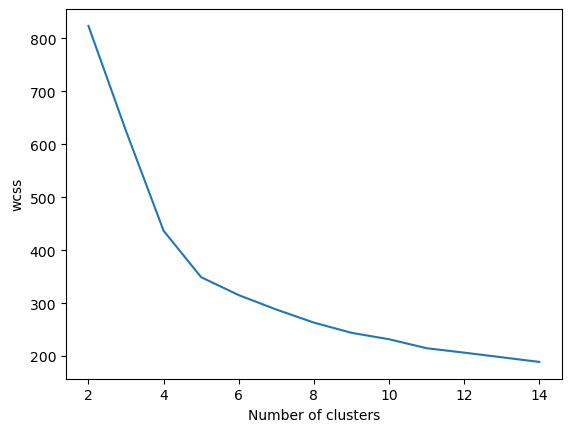

In [65]:
plt.plot(range(2,15), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [66]:
silh = []

for i in range(2,15):
    model = KMeans(n_clusters = i)
    labels = model.fit_predict(pca_fitted)
    score = silhouette_score(pca_fitted,labels)
    print(i,score)
    silh.append(score)

2 0.5359305109194767
3 0.4648452938858306
4 0.47483765255961036
5 0.4430672072796035
6 0.4037918219414184
7 0.3910129642875151
8 0.3802395170787956
9 0.3409622758111343
10 0.34475067980623353
11 0.35049395314821935
12 0.3532775747665656
13 0.3511954164318464
14 0.3509574418764574


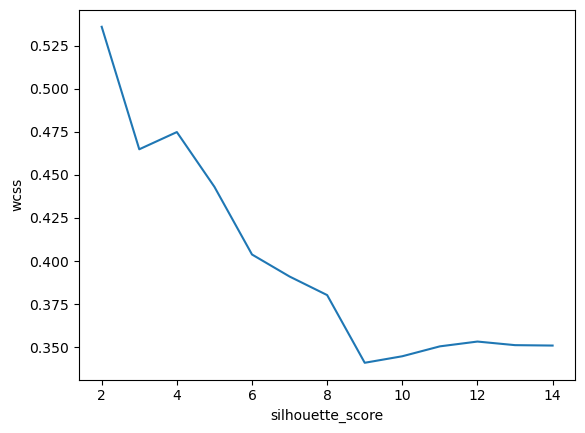

In [67]:
plt.plot(range(2,15), silh)
plt.xlabel('silhouette_score')
plt.ylabel('wcss')
plt.show()

In [ ]:
# From above we can select we can select number of clusters = 4

In [69]:
# Building the KMeans Clustering model with PCA

model = KMeans(n_clusters = 4, random_state = 0)
Clusters = model.fit_predict(pca_fitted)
Clusters


array([1, 1, 1, ..., 2, 1, 1])

In [70]:
df_scaled['Clusters'] = Clusters

In [71]:
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,2
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


<AxesSubplot:xlabel='Clusters', ylabel='count'>

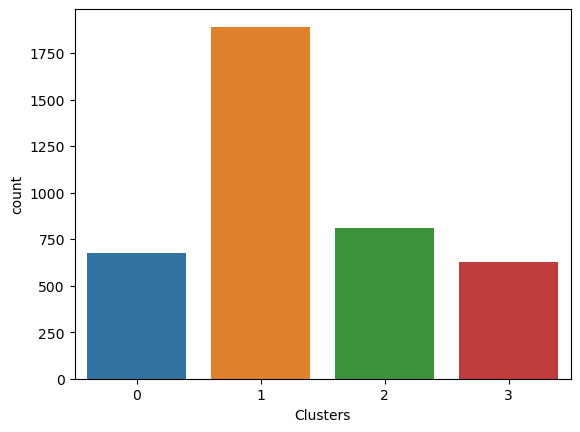

In [72]:
sns.countplot(x="Clusters", data=df_scaled)